In [8]:
cd ..

c:\Users\RMG_AMMOURI\Desktop\02- Exchange Rate


In [7]:
import sys, importlib
sys.path.append(r"\03-Function")
import Functionre
importlib.reload(Functionre)

<module 'Functionre' from 'c:\\Users\\RMG_AMMOURI\\Desktop\\02- Exchange Rate\\03-Function\\Functionre.py'>

# Import Data

In [10]:
import pandas as pd
df_brut = pd.read_excel('02-Data/data.xlsx', index_col='Date', parse_dates=True)
df = df_brut.asfreq('MS')  # monthly start frequency

# Data Processing

In [53]:
print(df_brut.head(3))
print(df.head(3))

                 EUR    USD       GBP
Date                                 
2013-01-01  2.067106  1.556  2.482944
2013-02-01  2.078093  1.556  2.409489
2013-03-01  2.051233  1.582  2.385441
                 EUR    USD       GBP
Date                                 
2013-01-01  2.067106  1.556  2.482944
2013-02-01  2.078093  1.556  2.409489
2013-03-01  2.051233  1.582  2.385441


## Plot Train / Test sample

✅ Figure saved as: 04-Graphs/train_test_split\train_test_split_grid.jpeg


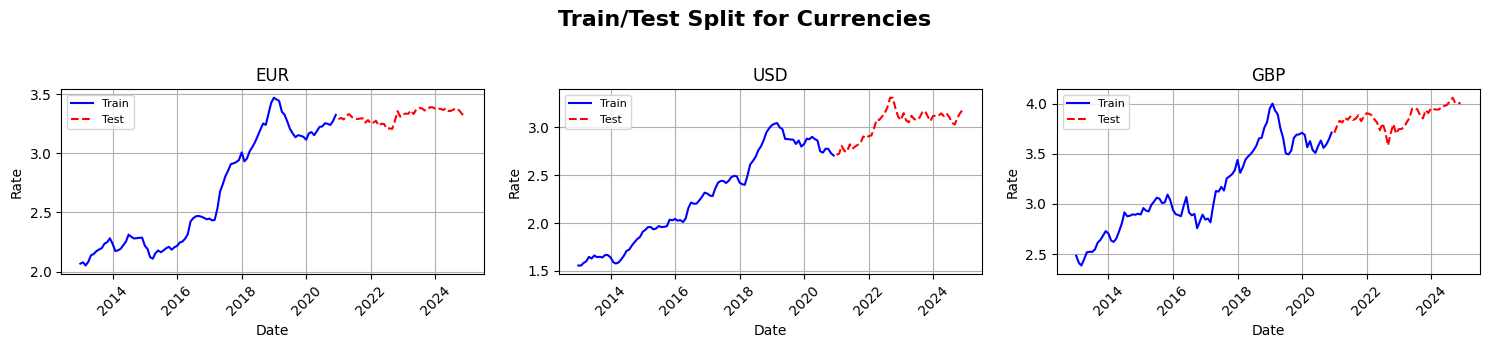

In [54]:
Functionre.plot_train_test_split_grid(
    df=df,
    currency_list=["EUR", "USD", "GBP"],
    train_start="2013-01",
    train_end="2020-12",
    test_start="2021-01",
    test_end="2024-12"
)

## Check stationary

In [11]:
d_eur = df.EUR
d_usd = df.USD
d_gbp = df.GBP

In [56]:
timeseries_eur = df['EUR']
timeseries_usd = df['USD']
timeseries_gbp = df['GBP']

print(Functionre.check_stationarity(timeseries_eur))
print(Functionre.check_stationarity(timeseries_usd))
print(Functionre.check_stationarity(timeseries_gbp))

Results of Dickey-Fuller Test:
Test Statistic                  -1.413664
p-value                          0.575708
#Lags Used                       1.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -1.395018
p-value                          0.584662
#Lags Used                       1.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -1.394031
p-value                          0.585135
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)       

# Modeling

In [12]:
train_EUR = pd.DataFrame(d_eur[:100])
test_EUR = pd.DataFrame(d_eur[100:])

train_USD = pd.DataFrame(d_usd[:100])
test_USD = pd.DataFrame(d_usd[100:])

train_GBP = pd.DataFrame(d_gbp[:100])
test_GBP = pd.DataFrame(d_gbp[100:])

## ARIMA

In [13]:
currencies = ["EUR", "USD", "GBP"]

# Tu stockes les prévisions dans un dictionnaire si besoin
forecast_results_arima = {}

for cur in currencies:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    order = (2, 1, 1)
    seasonal_order = (0, 1, 1, 12)

    print(f"📈 Traitement de la devise : {cur}")
    forecast_results_arima[cur] = Functionre.sarima_TRE(y, order, seasonal_order, y_to_train, y_to_test, cur)



📈 Traitement de la devise : EUR


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


✅ SARIMA model saved to 05-Forecast_output/01-Models\sarima_model_20250827_071707_EUR.pkl


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_arima_long_20250827_071707_EUR.xlsx
📈 Traitement de la devise : USD


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ SARIMA model saved to 05-Forecast_output/01-Models\sarima_model_20250827_071801_USD.pkl


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive 

✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_arima_long_20250827_071801_USD.xlsx
📈 Traitement de la devise : GBP
✅ SARIMA model saved to 05-Forecast_output/01-Models\sarima_model_20250827_071856_GBP.pkl


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_arima_long_20250827_071856_GBP.xlsx


## SVR

In [14]:
forecast_results_svr = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📈 Traitement SVR pour {cur}")
    forecast_results_svr[cur] = Functionre.svr_TRE(y, y_to_train, y_to_test, cur)


📈 Traitement SVR pour EUR
✅ SVR model saved to 05-Forecast_output/01-Models\svr_model_20250827_072250_EUR.pkl
✅ SVR forecasts saved to 05-Forecast_output/02-Forecast_test\output_svr_long_20250827_072250_EUR.xlsx
📈 Traitement SVR pour USD
✅ SVR model saved to 05-Forecast_output/01-Models\svr_model_20250827_072251_USD.pkl
✅ SVR forecasts saved to 05-Forecast_output/02-Forecast_test\output_svr_long_20250827_072251_USD.xlsx
📈 Traitement SVR pour GBP
✅ SVR model saved to 05-Forecast_output/01-Models\svr_model_20250827_072252_GBP.pkl
✅ SVR forecasts saved to 05-Forecast_output/02-Forecast_test\output_svr_long_20250827_072252_GBP.xlsx


## Decision Tree

In [15]:
forecast_results_dtc = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Decision Tree pour {cur}")
    forecast_results_dtc[cur] = Functionre.dtc_TRE(y, y_to_train, y_to_test, cur)

📊 Forecast avec Decision Tree pour EUR
✅ Decision Tree model saved to 05-Forecast_output/01-Models\tree_model_20250827_072255_EUR.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_tree_long_20250827_072255_EUR.xlsx
📊 Forecast avec Decision Tree pour USD
✅ Decision Tree model saved to 05-Forecast_output/01-Models\tree_model_20250827_072256_USD.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_tree_long_20250827_072256_USD.xlsx
📊 Forecast avec Decision Tree pour GBP
✅ Decision Tree model saved to 05-Forecast_output/01-Models\tree_model_20250827_072257_GBP.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_tree_long_20250827_072257_GBP.xlsx


In [16]:
forecast_results_dt = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Decision Tree pour {cur}")
    forecast_results_dt[cur] = Functionre.dt_TRE(y, y_to_train, y_to_test, cur)



📊 Forecast avec Decision Tree pour EUR
✅ Decision Tree model saved to 05-Forecast_output/01-Models\dt_model_20250827_072300_EUR.pkl
✅ Decision Tree forecasts saved to 05-Forecast_output/02-Forecast_test\output_dt_long_20250827_072300_EUR.xlsx
📊 Forecast avec Decision Tree pour USD
✅ Decision Tree model saved to 05-Forecast_output/01-Models\dt_model_20250827_072302_USD.pkl
✅ Decision Tree forecasts saved to 05-Forecast_output/02-Forecast_test\output_dt_long_20250827_072302_USD.xlsx
📊 Forecast avec Decision Tree pour GBP
✅ Decision Tree model saved to 05-Forecast_output/01-Models\dt_model_20250827_072303_GBP.pkl
✅ Decision Tree forecasts saved to 05-Forecast_output/02-Forecast_test\output_dt_long_20250827_072303_GBP.xlsx


## Neural Network (MLP)

In [17]:
# Paramètres spécifiques par devise  sgd adam  lbfgs tanh  'identity', 'logistic', 'tanh', 'relu'
mlp_params = {
    "EUR": {"activation": "tanh", "solver": "lbfgs", "lags": 48},
    "USD": {"activation": "tanh", "solver": "sgd", "lags": 48},
    "GBP": {"activation": "tanh", "solver": "adam", "lags": 48}
}


forecast_results_mlp = {}

for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Neural Net pour {cur}")

    params = mlp_params[cur]
    
    forecast_results_mlp[cur] = Functionre.neural_net_TRE(y=y, y_to_train=y_to_train, y_to_test=y_to_test,
        cur=cur, hidden_layer_sizes=(48,),  # ou autre si besoin
        max_iter=1000, lags=params["lags"], activation=params["activation"]
    )


📊 Forecast avec Neural Net pour EUR
✅ Neural network model saved to 05-Forecast_output/01-Models\nn_model_20250827_072307_EUR.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_nn_long_20250827_072307_EUR.xlsx
📊 Forecast avec Neural Net pour USD
✅ Neural network model saved to 05-Forecast_output/01-Models\nn_model_20250827_072317_USD.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_nn_long_20250827_072317_USD.xlsx
📊 Forecast avec Neural Net pour GBP
✅ Neural network model saved to 05-Forecast_output/01-Models\nn_model_20250827_072327_GBP.pkl
✅ Forecasts saved to 05-Forecast_output/02-Forecast_test\output_nn_long_20250827_072327_GBP.xlsx


## LSTM

In [18]:
forecast_results_lstm = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Decision Tree pour {cur}")
    forecast_results_lstm[cur] = Functionre.lstm_TRE(y, y_to_train, y_to_test, cur)

📊 Forecast avec Decision Tree pour EUR


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOUR

✅ LSTM model saved and forecasts exported for EUR
📊 Forecast avec Decision Tree pour USD


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOUR

✅ LSTM model saved and forecasts exported for USD
📊 Forecast avec Decision Tree pour GBP


c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\exchage_rate\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\RMG_AMMOUR

✅ LSTM model saved and forecasts exported for GBP


## XGBoost

In [19]:
forecast_results_xgboost = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Decision Tree pour {cur}")
    forecast_results_xgboost[cur] = Functionre.xgboost_TRE(y, y_to_train, y_to_test, cur)

📊 Forecast avec Decision Tree pour EUR
✅ XGBoost model saved and forecasts exported for EUR
📊 Forecast avec Decision Tree pour USD
✅ XGBoost model saved and forecasts exported for USD
📊 Forecast avec Decision Tree pour GBP
✅ XGBoost model saved and forecasts exported for GBP


## Heston

In [20]:
forecast_results_heston = {}
for cur in ["EUR", "USD", "GBP"]:
    y = df[cur]
    y_to_train = eval(f"train_{cur}")[cur]
    y_to_test = eval(f"test_{cur}")[cur]

    print(f"📊 Forecast avec Decision Tree pour {cur}")
    forecast_results_heston[cur] = Functionre.heston_TRE(y, y_to_train, y_to_test, cur)

📊 Forecast avec Decision Tree pour EUR
✅ Heston forecast exported for EUR
📊 Forecast avec Decision Tree pour USD
✅ Heston forecast exported for USD
📊 Forecast avec Decision Tree pour GBP
✅ Heston forecast exported for GBP


# Evaluation

## Construct Data

In [21]:
models = ['arima', 'svr', 'dtc', 'dt', 'mlp', 'lstm', 'xgboost', 'heston']
currencies = ['EUR', 'USD', 'GBP']

# Dictionnaire des résultats
forecast_results_dict = {
    f'forecast_results_{model}': globals()[f'forecast_results_{model}'] for model in models
}

# Construction des prévisions par devise
forecast_dfs = Functionre.build_currency_forecasts(models, currencies, forecast_results_dict)

# Réinitialiser l'index de df_brut s'il le faut
df_brut_reset = df_brut.reset_index()

# Fusion avec les valeurs observées
merged_forecasts = Functionre.merge_forecasts_with_actuals(forecast_dfs, df_brut_reset, currencies)

# Accès aux résultats finaux
EUR_forecast = merged_forecasts['EUR_forecast']
USD_forecast = merged_forecasts['USD_forecast']
GBP_forecast = merged_forecasts['GBP_forecast']

## Graphics

### Uni

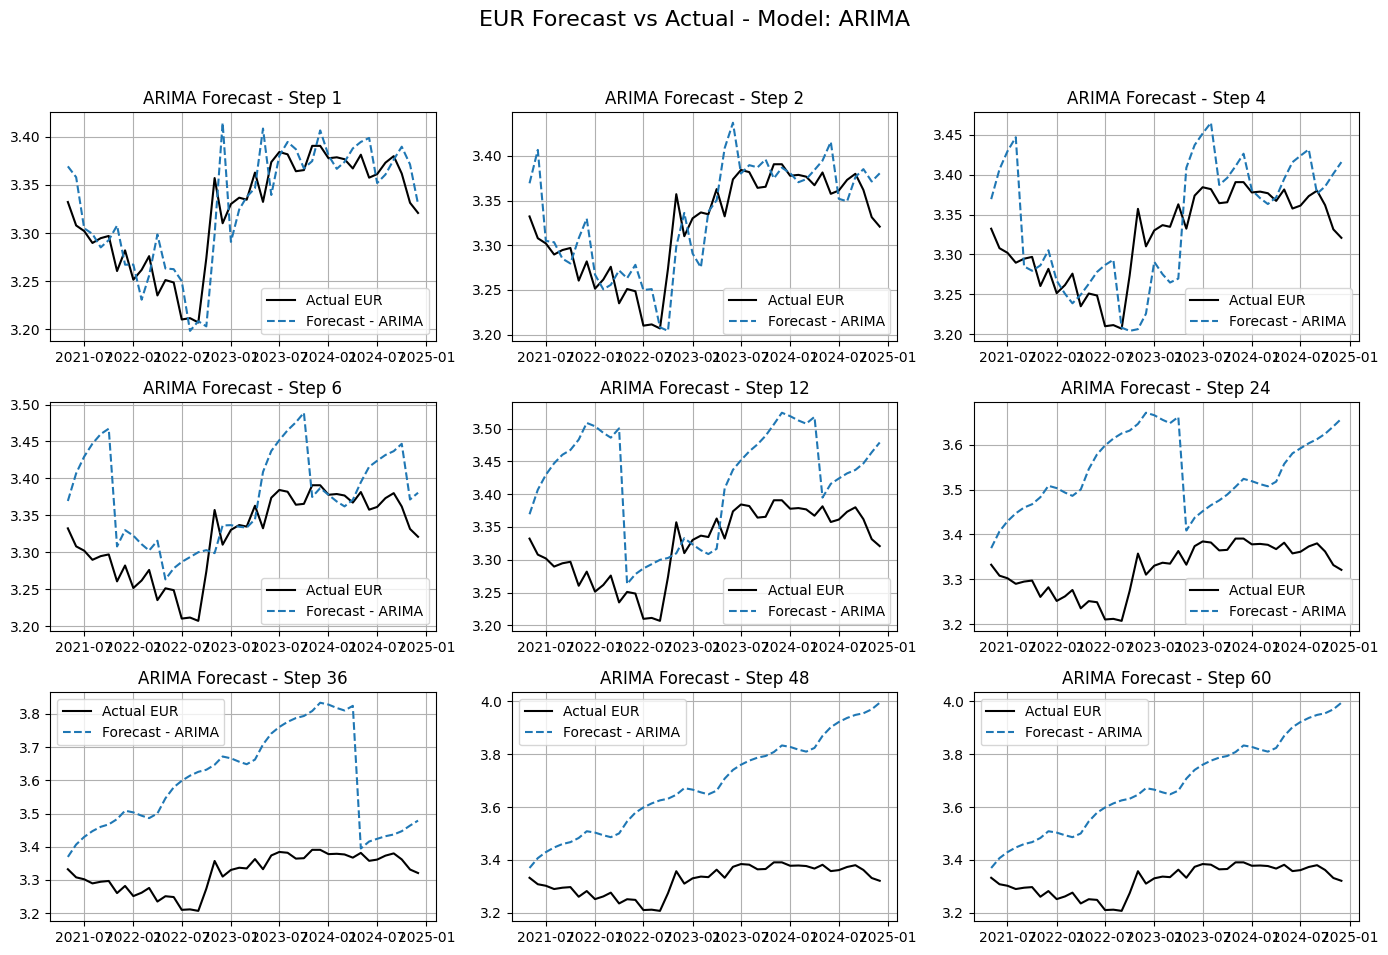

In [ ]:
models = ['arima', 'svr', 'dtc', 'dt', 'mlp', 'lstm', 'xgboost', 'heston']
currencies = ['EUR', 'USD', 'GBP']
Functionre.plot_forecast_by_step_and_model_and_currency(merged_forecasts, models, currencies, steps_to_plot=[1,2,4, 6, 12, 24, 36, 48, 60])

### Multi

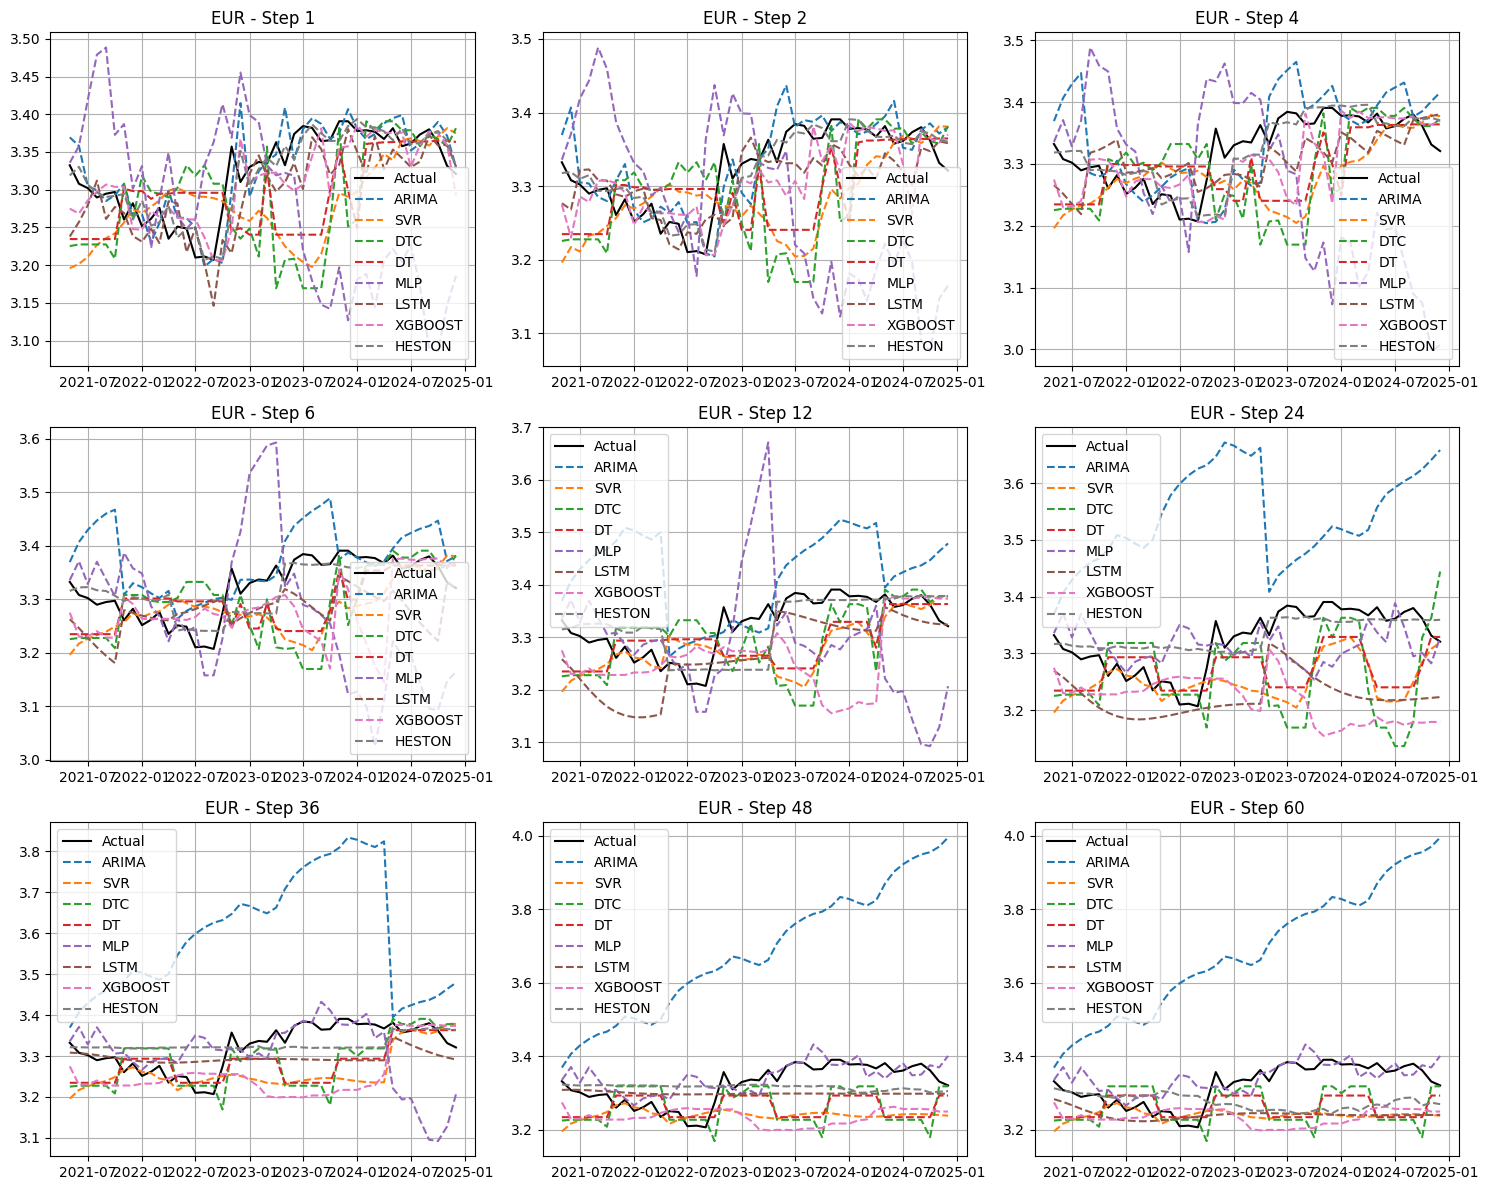

In [ ]:
models = ['arima', 'svr', 'dtc', 'dt', 'mlp', 'lstm', 'xgboost', 'heston']
currencies = ['EUR', 'USD', 'GBP']

Functionre.plot_forecasts_with_ci_by_currency(merged_forecasts, models, currencies)


## Creteria

In [69]:
models = ['arima', 'svr', 'dtc', 'dt', 'mlp', 'lstm', 'xgboost', 'heston']
currencies = ['EUR', 'USD', 'GBP']
steps = [1, 2, 4, 6, 12, 24, 36, 48, 60]

df_metrics = Functionre.compute_error_metrics(merged_forecasts, models, currencies, steps=steps)


In [70]:
# Enregistrement Excel
output_path = "05-Forecast_output/04-Forecast_eval/forecast_metrics_by_model.xlsx"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_metrics.to_excel(output_path, index=False)

In [71]:
df_metrics

,curr,model,metric,1,2,4,6,12,24,36,48,60
0,EUR,arima,MAE,0.024052,0.027772,0.048340,0.056215,0.104518,0.218687,0.270433,0.362022,0.362022
1,EUR,arima,RMSE,0.033260,0.036321,0.062101,0.071666,0.125130,0.240963,0.302913,0.389857,0.389857
2,EUR,arima,Theil,0.005000,0.005456,0.009319,0.010702,0.018560,0.035103,0.043784,0.055607,0.055607
3,EUR,svr,MAE,0.066757,0.065593,0.065839,0.065034,0.062367,0.076016,0.069865,0.086870,0.086870
4,EUR,svr,RMSE,0.081769,0.080491,0.080493,0.079291,0.076687,0.091571,0.086732,0.099621,0.099621
...,...,...,...,...,...,...,...,...,...,...,...,...
67,GBP,xgboost,RMSE,0.074224,0.092413,0.133882,0.199422,0.192940,0.160040,0.249857,0.263742,0.263742
68,GBP,xgboost,Theil,0.009631,0.012022,0.017484,0.026256,0.025408,0.021029,0.033214,0.035130,0.035130
69,GBP,heston,MAE,0.039390,0.040784,0.053911,0.060218,0.082970,0.096012,0.072850,0.112243,0.093067
70,GBP,heston,RMSE,0.050956,0.052260,0.064566,0.075869,0.095298,0.111548,0.087938,0.134280,0.112545


## Fan chart

📊 Generating fan chart for EUR - mlp


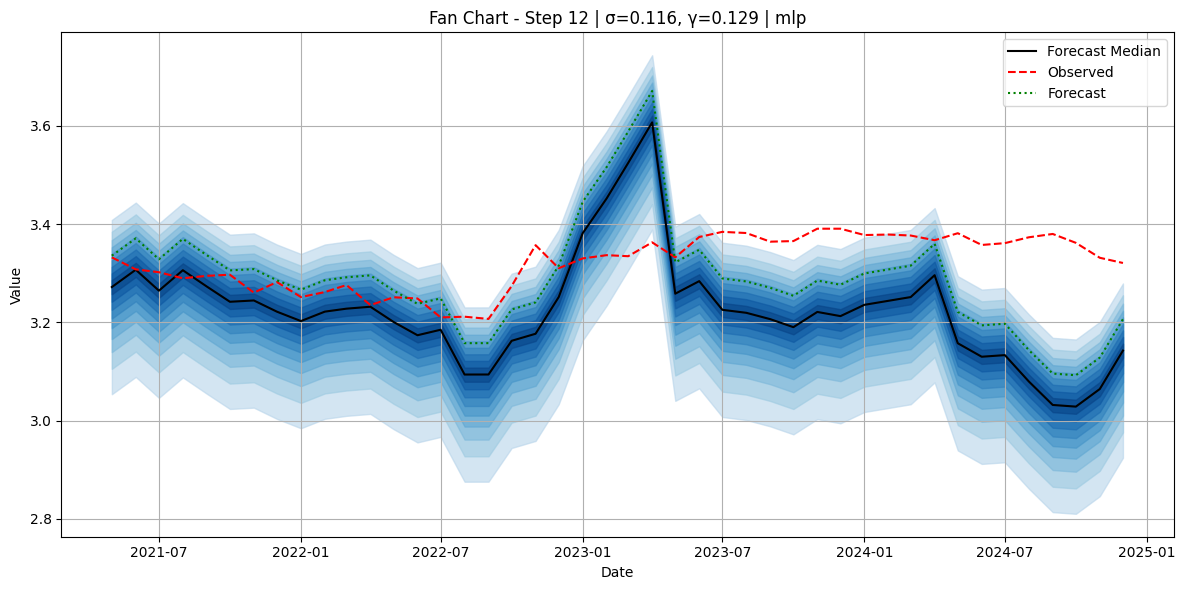

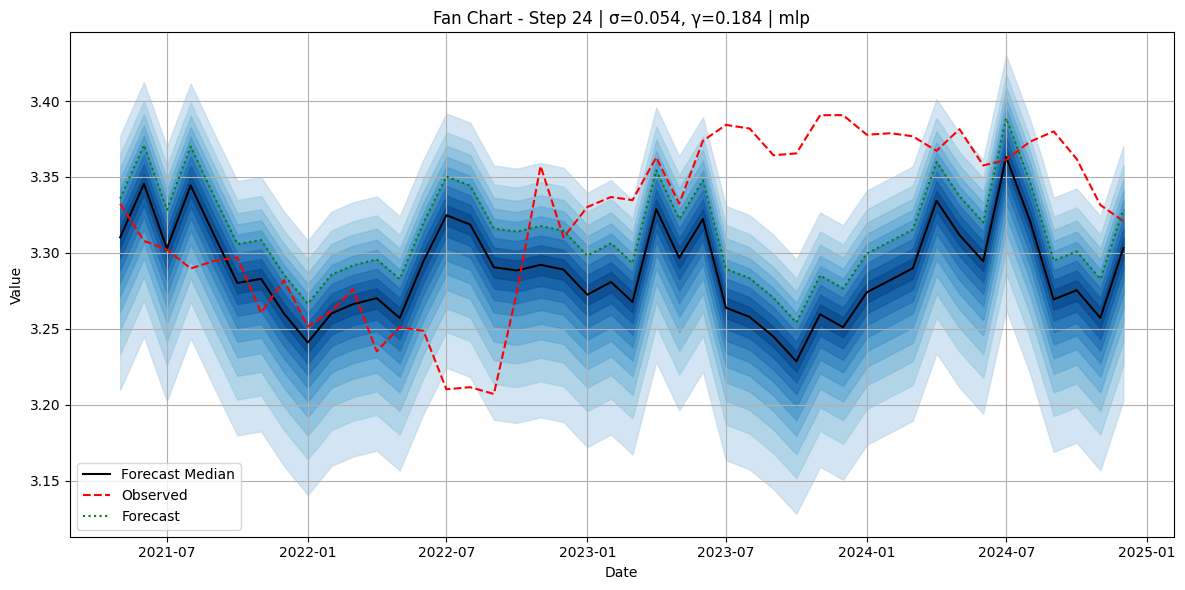

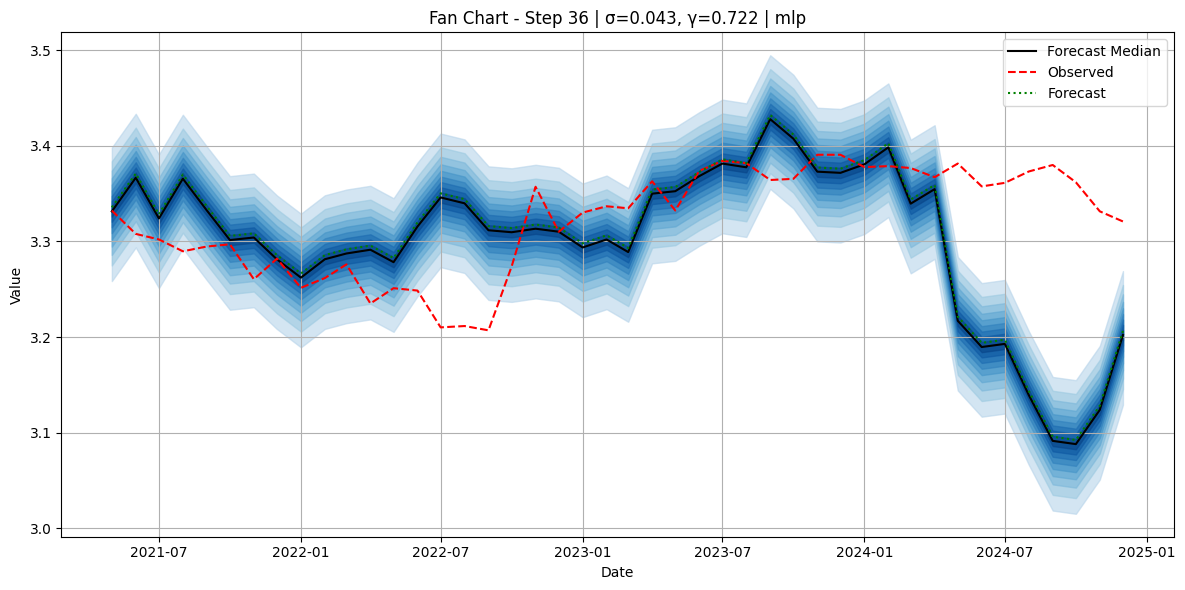

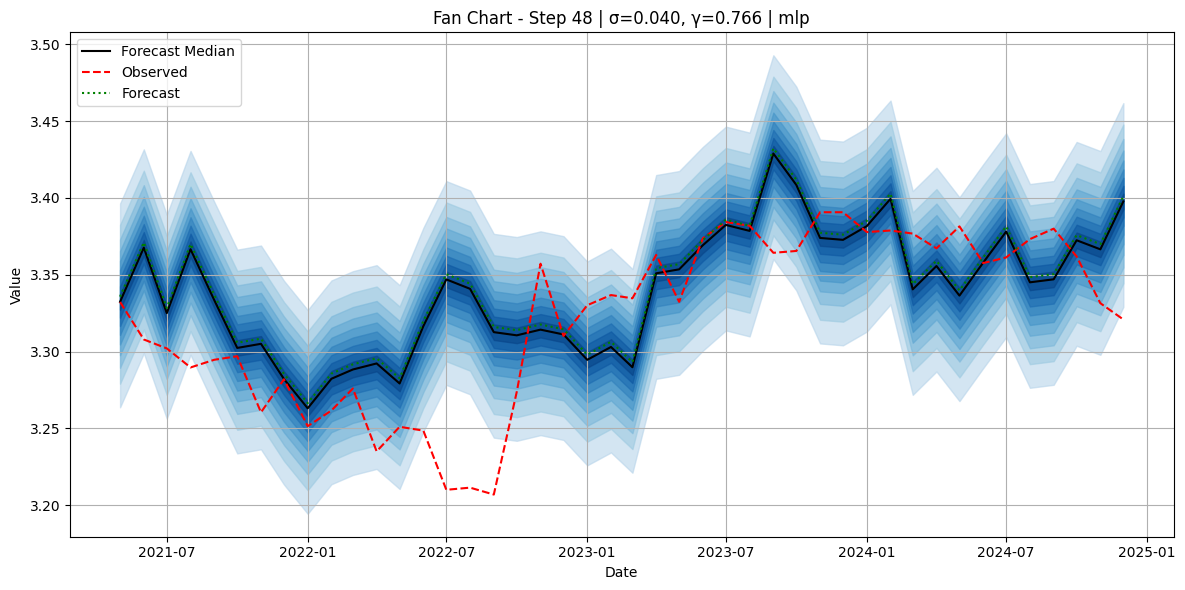

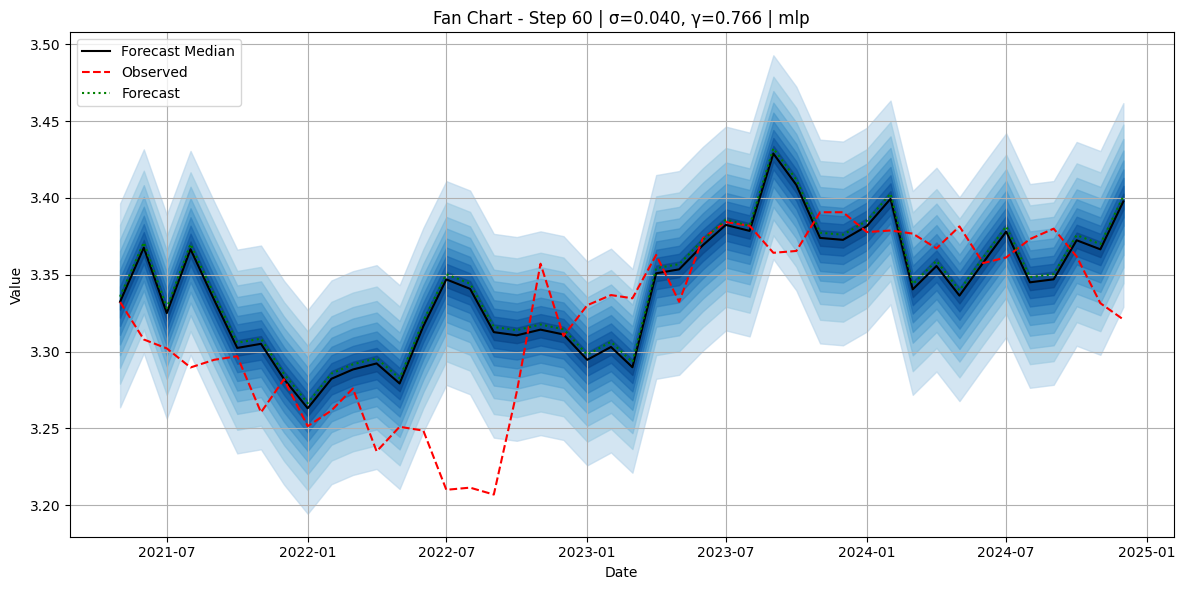

In [ ]:
import numpy as np
probs = np.arange(0.05, 1, 0.05)
step = [12, 24, 36, 48, 60]

models = ['arima', 'svr', 'dtc', 'dt', 'mlp', 'lstm', 'xgboost', 'heston']
currencies = ['EUR', 'USD', 'GBP']

for curr in currencies:
    df = merged_forecasts[f'{curr}_forecast']
    observed_col = f'{curr}_observed'
    for model in models:
        if model not in df.columns:
            continue
        print(f"📊 Generating fan chart for {curr} - {model}")
        fan_data = Functionre.generate_static_fanchart_by_step(df, probs, forecast_col=model, observed_col=observed_col, steps=step)
        Functionre.plot_fancharts_all_steps(fan_data, df, probs, forecast_col=model, observed_col=observed_col, steps=step, curr=curr)
